<a href="https://colab.research.google.com/github/Annette-1/Ecuaciones_Diferenciales_Parciales/blob/main/Caminata_aleatoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:blue;">**CAMINATA ALEATORIA 1D**</span>
 <span style="color:purple;"></span>

Una caminata aleatoria unidimensional es un proceso estocástico donde una partícula se mueve en línea recta , dando pasos discretos.En cada paso:


*   Se mueve a la derecha con probabilidad $p$
*   Se mueve a la izquierda con probabilidad $q=1-p$ (esta expresión esta dada por *$p+q=1$*




<span style="color:purple;">**Ejercicio**</span>
Escribir un còdigo que implemente  una caminata aleatoria 1D, con probabilidad $p$, de moverse a la izquierda ,tal que $p+q=1$.

In [56]:
import random  #esta libreria genera numeros aleatorios
import matplotlib.pyplot as plt #lIBRERIA PARA LA GRAFICA

Definimos los parametros
* $p$=probalidad esta se encuentra entre $0-1$
* $N$= numero de pasos


In [57]:
def caminata (p):
  x=[0] #creamos una lista vacia para guardar los valores,donde x =Pocisiones
  for _ in range(100):
    r=random.random() #generamos un numero aleatorio entre 0 y 1
    if r<p: #esto nos indica el moviemiento de la particula
      n_p=x[-1]+1  #indica el movimiento a la derecha
    else:
      n_p=x[-1]-1 #indica el movimento a la izquierda
    x.append(n_p)

  return x

Graficamos la simulación de una caminata unidimensional

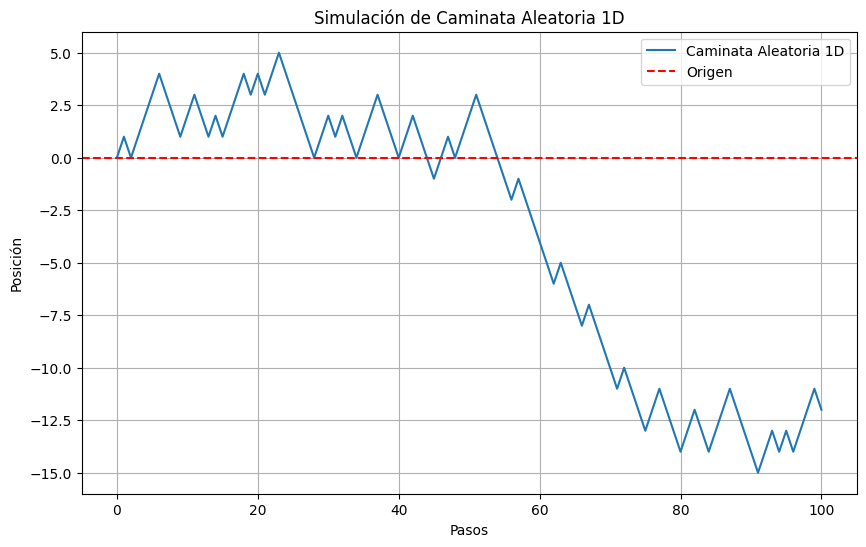

In [58]:
fig, ax = plt.subplots(figsize=(10, 6)) # Crea la figura y los ejes antes de plotear
ax.plot(caminata(0.5), label='Caminata Aleatoria 1D') # Añade una etiqueta para la leyenda
ax.axhline(y=0, color='red', linestyle='--', label='Origen') # Añade una etiqueta para la línea horizontal
ax.grid(True)
ax.legend() # La leyenda ahora mostrará las etiquetas
ax.set_title('Simulación de Caminata Aleatoria 1D') # Añade un título al gráfico
ax.set_xlabel('Pasos') # Etiqueta el eje X
ax.set_ylabel('Posición') # Etiqueta el eje Y
plt.show()

<span style="color:purple;">**¿Qué preguntas surgen?**</span>
 * Estadísticas básicas de la lista

 vamos a analizar cual es la $máxima$ posicion de $x$.

 Ademas de la **minima** posición de $x$


In [59]:
x = caminata(0.5) #Llamamos a la función que definimos anteriormente
print(f"Posición final: {x[-1]}")
print(f"Posición máxima: {max(x)}")
print(f"Posición mínima: {min(x)}")

Posición final: -2
Posición máxima: 14
Posición mínima: -4


Otra pregunta que puede llegar a surguir es el ¿numero total de pasos?

el rango de las posiciones calculada por la expresión
$$max(x) - min(x)$$

In [60]:
print(f"Número total de pasos: {len(x)-1}")
print(f"Rango de posiciones: {max(x) - min(x)}")
print(f"Primeros 5 pasos: {x[:5]}") #esto lo podemos omitir no es necesario
print(f"Últimos 5 pasos: {x[-5:]}") # nos sirve para visulizar la lista

Número total de pasos: 100
Rango de posiciones: 18
Primeros 5 pasos: [0, 1, 2, 3, 4]
Últimos 5 pasos: [-2, -1, 0, -1, -2]


 ¿Cuántos movimientos a la derecha e izquierda?

In [61]:
d=0 # parametros: contadores d y I
I=0
for i in range(1, len(x)): # Definimos una funcion para contar hacia la D o I
    if x[i] > x[i-1]: # si cumple se suma uno a la derecha
        d += 1
    else: # caso contrario a la izquierda
        I += 1
print(f"Movimientos a la derecha: {d}")
print(f"Movimientos a la izquierda: {I}")
print(f"Diferencia: {d - I}")

Movimientos a la derecha: 49
Movimientos a la izquierda: 51
Diferencia: -2


¿Cuál es la desviación estándar, varianza y la media?

In [62]:
media = sum(x) / len(x) #podemos sustituir por mean de la libreria simpy
varianza = sum((xi - media) ** 2 for xi in x) / len(x)
desviacion = varianza ** 0.5

In [63]:
print(f"Posición media: {media:.2f}")
print(f"Varianza: {varianza:.2f}")
print(f"Desviación estándar: {desviacion:.2f}")

Posición media: 5.90
Varianza: 19.42
Desviación estándar: 4.41


 ¿Cuántas veces toco el origen?

Para ello definimos una funcion con los parametros:

 * r=regresos
 * pr=pasos_regreso

In [64]:
def contar_regresos_al_0(lista_posiciones):
    """Cuenta cuántas veces la partícula regresa a la posición 0"""
    r = 0
    pr = []

    for i, pos in enumerate(lista_posiciones):
        if pos == 0:
            r += 1
            pr.append(i)
    return r, pr

In [65]:
r_count, pr_steps = contar_regresos_al_0(x)
print("ANÁLISIS DE REGRESOS AL ORIGEN (0)")
print("="*50)
print(f"Número total de veces en 0: {r_count}")
print(f"Pasos en los que estuvo en 0: {pr_steps}")

ANÁLISIS DE REGRESOS AL ORIGEN (0)
Número total de veces en 0: 5
Pasos en los que estuvo en 0: [0, 80, 82, 90, 98]


## <span style="color:purple;">Conclusiones</span>
1.  NATURALEZA DEL FENÓMENO:

      • Los regresos al origen son eventos probabilísticos

      • No hay un patrón fijo de regreso

      • Dependen fuertemente de la probabilidad de movimiento

2.  CARACTERÍSTICAS OBSERVADAS:

      • Los regresos pueden ocurrir en cualquier momento

      • Intervalos entre regresos son variables

      • Posibilidad de largos períodos sin regresar

      • Algunas caminatas nunca regresan (excepto inicio)

"En una caminata aleatoria simétrica, el origen es como un hogar:
siempre existe la posibilidad de regresar, pero nunca la certeza."